<a href="https://colab.research.google.com/github/rivaldomrtd/TPL/blob/master/fuzzy_interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5a3013e43d206e3573f2cc5efa80842f13380568ce34e28cb88cd73a274363a1
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


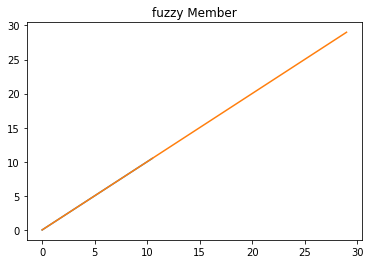

In [108]:
import numpy as np
import skfuzzy as fuzzy 
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt
x_service = np.arange(0, 11, 0.5)
x_food = np.arange(0, 11, 0.5)
x_tip = np.arange(0, 30, 1.0)
plt.title("fuzzy Member")
plt.plot(x_food,x_service,x_tip)



In [98]:
food = ctrl.Antecedent(x_food,"food")
service = ctrl.Antecedent(x_service, 'service')
service['poor'] = fuzzy.trimf(service.universe, [0, 0, 5])
service['good'] = fuzzy.trimf(service.universe, [0, 5, 10])
service['excellent'] = fuzzy.trimf(service.universe, [5, 10, 10])
food['rancid'] = fuzzy.trimf(food.universe, [0, 0, 8])
food['lumayan'] = fuzzy.trimf(food.universe, [0, 5, 10])
food['delicious'] = fuzzy.trimf(food.universe, [5, 10, 10])


In [99]:
x, y = np.meshgrid(x_service, x_food, indexing="ij")
tip_low_grid = 5.0 + x * 0.2 + y * 0.2
tip_middle_grid = 5.0 + x * 0.5
tip_high_grid = 5.0 + x + y


In [100]:
service_score = 9.8
food_score = 6.5
service_low_degree = fuzzy.interp_membership(x_service, service['poor'].mf, service_score)
service_middle_degree = fuzzy.interp_membership(x_service, service['good'].mf, service_score)
service_high_degree = fuzzy.interp_membership(x_service, service['excellent'].mf, service_score)
food_low_degree = fuzzy.interp_membership(x_food, food['rancid'].mf, food_score)
food_middle_degree = fuzzy.interp_membership(x_food, food['lumayan'].mf, food_score)
food_high_degree = fuzzy.interp_membership(x_food, food['delicious'].mf, food_score)
# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree
)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)


In [110]:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

In [107]:
z1 = 5.0 + 0.2 * food_score + 0.2 * service_score
z2 = 5.0 + 0.5 * food_score + 0.5 * service_score
z3 = 5 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
x_service = np.arange(0, 11, 0.5)
x_food = np.arange(0, 11, 0.5)
x_tip = np.arange(0, 30, 1.0)
plt.title("fuzzy Member")
plt.plot(x_food,x_service,x_tip)

In [106]:
print(z)

18.966526315789476
